<a href="https://colab.research.google.com/github/TeraneAgaeva/Data-Analysis-course-/blob/main/%22hw_6_3_%D0%9F%D0%B5%D1%80%D0%B5%D0%B2%D1%96%D1%80%D0%BA%D0%B0_%D0%B2%D0%B8%D0%B1%D1%96%D1%80%D0%BA%D0%B8_%D0%BD%D0%B0_%D0%BD%D0%BE%D1%80%D0%BC%D0%B0%D0%BB%D1%8C%D0%BD%D1%96%D1%81%D1%82%D1%8C_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Домашнє завдання на тему "Перевірка вибірки на нормальність"

0.Зчитайте дані з `data.csv` та запишіть значення колонки data у форматі np.ndarray в змінну data. Ми будемо далі працювати з цією змінною.

In [42]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

In [48]:
from scipy.stats import norm
from scipy.stats import shapiro, normaltest
from statsmodels.stats.weightstats import ztest
from scipy.stats import shapiro, normaltest

In [18]:
!pip install statsmodels

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!ls drive/MyDrive/data.csv

drive/MyDrive/data.csv


In [5]:
data_path = 'drive/MyDrive/data.csv'
data1 = pd.read_csv(data_path)

In [6]:
data = np.array(data1.data)

data

array([17.49945292, 19.66239904,  7.18282343, 29.84162485,  9.23938649,
       14.94951581, 23.0172885 , 12.52827148, 13.65228669, 14.54595431,
       23.30872427, 33.75324808, 20.24923636, 13.29244733, 23.23434992,
       16.4230418 , 19.88521702, 27.05000732, 15.5127743 , 20.05415151,
       14.73135264, 19.06139498, 21.53942271, 14.06732571, 17.9670682 ,
       18.58289581, 16.17406993, 12.87432628, 11.47269664, 19.07902883,
       18.38565824, 33.38820073,  5.39139454, 20.67635903, 22.22266722,
       28.15780318, 23.01114324, 14.93471778, 20.00005857, 23.25411543,
       18.11895082, 24.62607043,  8.79145607, 30.387108  , 28.80606806,
       17.98593597, 23.66804468, 20.28782355, 15.02518827, 20.52626131,
       26.00219532, 17.71344489, 17.74598346, 19.55317542, 22.60097798,
       27.67027538, 16.19192417, 23.05037746, 21.29669604,  8.84832568,
       17.48410111, 19.20602661, 19.76257856, 21.9560206 ,  7.75806171,
       20.27753314, 15.93394654, 11.36336584, 23.14577858, 24.41

Запустіть код нижче. Для коректної робити всіх подальших методів дані мають бути у вигляді одновимірного вектора, тобто мати розмір (100,).

In [7]:
data.shape

(100,)

## Перевірка вибірки на нормальність

1.**Візуалізація розподілу**

Подивимось спершу на розподіл наших даних. Для цього побудуємо розподіл даних (графік на вигляд як гістограма, тільки він нормований так, аби сума під кривою була рівна 1), а на нього накладемо лінійний графік щільності (PDF - для побудови використовуємо `scipy.stats.norm.pdf(...)`) теоретичного нормального розподілу з середнім та стандартним відхиленням як у наших даних.

Візуалізацію будуємо за аналогією прикладу, що наводився у лекції, коли ми будували кілька кривих щільності для одних і тих самих даних, тільки значно більш спрощено, бо розподіл для порівняння у нас лише один - нормальний.

Побудуйте графік як наведено в очікуваному результаті та напишіть ваш висновок, чи схоже, що дані розподілені нормально?

Підказка: весь графік будується за 6 рядків коду, три з яких - підписи осей і графіку. Аби побудувати лінійний графік функції щільності та він наклався на гістограму, необхідно задати значення іксів з діапазону значень наших даних. Ці значення вже задані для вас, залишилось дописати 5 рядочків коду :)

Теорія: **density=True** в методі **plt.hist **означає, що гістограма буде нормованою таким чином, щоб площа під гістограмою дорівнювала 1. Це зручно для порівняння з функцією щільності ймовірності **(PDF)**, оскільки PDF також має площу під кривою рівну 1.

Без параметру **density=True** гістограма покаже частоту значень у кожному інтервалі (біні), а не ймовірність. Ось коротке пояснення параметру:

**density=False** (за замовчуванням): гістограма відображає кількість значень у кожному інтервалі.
**density=True:** гістограма нормується таким чином, що площа під гістограмою дорівнює 1.
Таким чином, коли ви використовуєте density=True, гістограма представляє ймовірність попадання значень у кожний інтервал, що робить її придатною для порівняння з теоретичною кривою щільності ймовірності (PDF).

In [35]:
# Обчислення середнього та стандартного відхилення
mean = np.mean(data)
std = np.std(data)

print(mean, std)

19.37755319670441 6.222214863419309


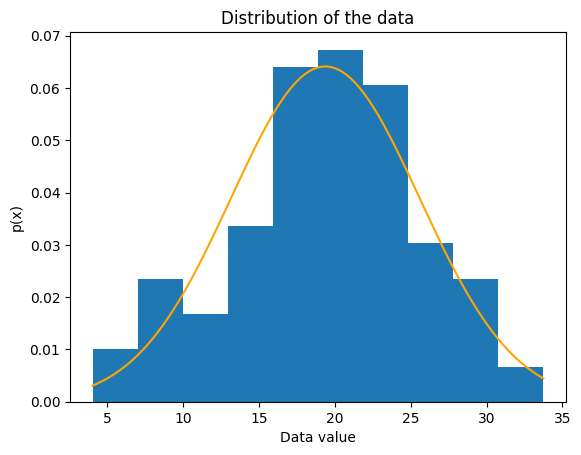

In [53]:
# Побудова гістограми, density=True задаємо нормальний розподіл, де площа буде = 1
plt.hist(data, bins=10, density=True)
# Побудова лінійного графіку щільності (PDF)
x_axis = np.arange(data.min(), data.max(), 0.01)
plt.plot(x_axis, norm.pdf(x_axis, mean, std), 'orange')
# Підписи осей і графіку
plt.xlabel('Data value')
plt.ylabel('p(x)')
plt.title('Distribution of the data')

# Показати графік
plt.show()

Теорія: p(x) на графіку означає ймовірність функції щільності (probability density function, PDF) для значення
𝑥
x.

У контексті гістограми та графіку PDF:

Гістограма відображає розподіл даних.
Лінія PDF показує теоретичну ймовірність для кожного значення
𝑥
x, виходячи з припущення, що дані розподілені нормально.
Формально,
𝑝
(
𝑥
)
p(x) визначає ймовірність того, що випадкова змінна
𝑋
X прийме значення в межах нескінченно малих інтервалів навколо
𝑥
x. Площа під кривою
𝑝
(
𝑥
)
p(x) на інтервалі
[
𝑎
,
𝑏
]
[a,b] дорівнює ймовірності того, що
𝑋
X прийме значення в цьому інтервалі.

In [44]:
alpha = 0.05
mean = np.mean(data)

In [45]:
ztest_Score, p_value = ztest(data, value = mean, alternative='larger')

ztest_Score, p_value

(0.0, 0.5)

In [47]:
#Висновок:
if(p_value <  alpha):
    print("Відхилити Н0, дані не мають нормальний розподіл.")
else:
    print("Н0 не може бути відхилена, дані мають нормальний розподіл.")

Н0 не може бути відхилена, дані мають нормальний розподіл.


Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1SB_HOIgwfZXrtglBBlDfMYjg2eGGBSIX)


2.**QQ графік**

Ще одним візуалізаційним методом перевірки розподілу вибірки даних на нормальність є графік квантиль-квантиль, Q-Q графік або QQ графік. У лекції ми розбирали, що це за графік, та як його інтерпретувати.

Побудуйте QQ-Plot для порівняння з нормальним розподілом наших даних та напишіть висновок з графіку, чи можна сказати, що дані розподілені за нормальним законом?

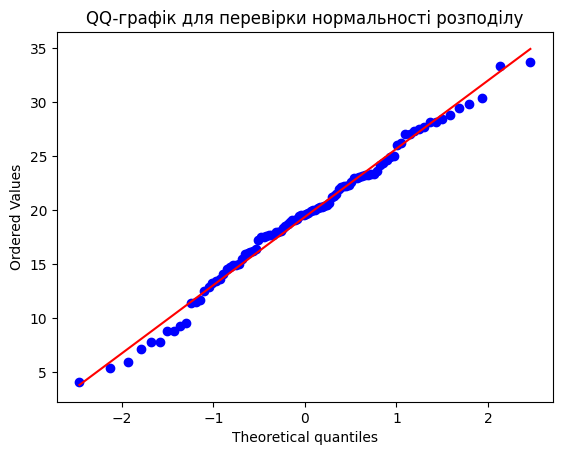

In [52]:
from scipy.stats import probplot
import matplotlib.pyplot as plt

probplot(data, dist="norm", plot=plt)
plt.title("QQ-графік для перевірки нормальності розподілу")
plt.show()

Теорія: Параметр **dist="norm"** у функції probplot з пакету scipy.stats означає, що для побудови QQ-графіка (графіка квантиль-квантиль) використовується нормальний розподіл. QQ-графік використовується для перевірки, чи розподіл даних відповідає певному теоретичному розподілу, у даному випадку нормальному розподілу.

Ось як це працює:

Квантилі вибірки: Квантилі вашої вибірки розраховуються і порівнюються з квантилями теоретичного розподілу (нормального розподілу, якщо dist="norm").

Теоретичні квантилі: Теоретичні квантилі розраховуються з використанням нормального розподілу.

Побудова графіка: Квантилі вибірки відображаються проти теоретичних квантилів. Якщо дані нормально розподілені, точки на графіку будуть лежати приблизно на прямій лінії.

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1-eDd16OVgqEjzFUBjJJzSMcwSrzNNm_V)

3.**Тест Шапіро-Вілка**

Тест Шапіро-Вілка визначає для вибірки, наскільки ймовірно, що вона була витягнута з нормального розподілу.
Нульова гіпотеза H0 тесту Шапіро-Вилка полягає в тому, що випадкова величина, вибірка якої відома, розподілена за нормальним законом. Альтернативна гіпотеза H1 полягає в тому, що закон розподілу **не** є нормальним.

**Задача**: протестувати нашу вибірку на нормальність з допомогою теcта Шапіро-Вілка, реалізованого в функцію [scipy.stats.shapiro](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html). Висновок зробіть на основі аналізу p-значення. На рівні значущості = 0.05 чи можемо ми відхилити гіпотезу Н0? Відповідь можна надати текстом, або написати простий if-else блок для виведення висновку спираючись на отримане p-значення. Нагадування:
- p <= alpha: відхиляємо H0.
- p > alpha: не можемо відхилити H0.

Також пропоную вам переглянути оце [відео](https://youtu.be/eh9eYLBecWk), тут розказується про QQ графік, тест Шапіро, та звʼязок між ними.


In [49]:
from scipy.stats import shapiro, normaltest

In [50]:
# Тест Шапіро-Вілка
stat, p_value_shapiro = shapiro(data)
print("Тест Шапіро-Вілка:")
print("Статистика тесту:", stat)
print("P-значення:", p_value_shapiro)

Тест Шапіро-Вілка:
Статистика тесту: 0.9887855685963715
P-значення: 0.5677973106978921


In [51]:
# Інтерпретація результатів
if p_value_shapiro > 0.05:
    print("\nЗа результатами тесту Шапіро-Вілка дані мають нормальний розподіл (не відхиляємо H0).")
else:
    print("\nЗа результатами тесту Шапіро-Вілка дані не мають нормального розподілу (відхиляємо H0).")


За результатами тесту Шапіро-Вілка дані мають нормальний розподіл (не відхиляємо H0).
